# Initial set-up

In [41]:
import pandas as pd
from datetime import date, datetime
from matplotlib import pyplot as plt
import requests
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib as np

In [42]:
## This function helps to extract the data

base_url = "https://analytics.wikimedia.org/published/datasets"
cols =["wiki_db", "project", "country", "country_code", "activity_level", "count_eps", "sum_eps", "count_release_thresh", "editors", "edits", "time"]   #Table columns 

def get_url(ds, type):
    d = datetime.strptime(ds, "%Y-%m").date()
    if d < date(2023, 7, 1) or d > date.today():
        print("Not a valid date. Please try a month between July 2023 and now")
    else:
        if type == "monthly":
            return f"{base_url}/geoeditors_monthly/{ds}.tsv"
        elif type == "weekly":
            return f"{base_url}/geoeditors_weekly/{ds}.tsv"
    return None

# Get weekly data

In [43]:
#### generates the months list ####
current_date = datetime.now()
start_date = datetime(2023, 7, 1)
date_list = []

# Generate dates from July 2023 to one month before the current month
while start_date < current_date.replace(day=1):
    date_list.append(start_date.strftime("%Y-%m"))
    start_date += timedelta(days=30)  # Add 30 days to move to the next month

date_list = list(set(date_list))
date_list.sort()
#print(date_list)

masterdf = pd.DataFrame()
user_level = ["1 to 4", "5 to 99", "100 or more"]




# Select the country
Here you put the country code (ISO alpha-2 codes). For example, for Chile use "CL".

In [44]:
#get dataframe for all the weeks

country = "CL"

for i in date_list:
	try:
		ds = i
		url = get_url(ds, type="weekly")
		#print(url)
		df = pd.read_csv(url, delimiter='\t', names=cols, on_bad_lines='warn')                              
		filtered_df = df[df["country_code"] == country]                                                            #CL filter
		masterdf = pd.concat([masterdf, filtered_df], axis=0, ignore_index=True)                                #Create the masterdf 
	except:
		pass


In [45]:
masterdf_filtered = masterdf[masterdf['time'] != '2024-01-24']                 #Clean up the duplicates
masterdf_filtered


,wiki_db,project,country,country_code,activity_level,count_eps,sum_eps,count_release_thresh,editors,edits,time
0,bswikisource,bs.wikisource,Chile,CL,100 or more,1.1,0.9,8,8,41,2023-06-25
1,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,49,70,2023-06-25
2,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,47,60,2023-07-02
3,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,53,67,2023-07-09
4,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,51,69,2023-07-16
...,...,...,...,...,...,...,...,...,...,...,...
559,wikidatawiki,en.wikidata,Chile,CL,1 to 4,1.1,0.9,8,101,134,2024-05-12
560,frwiki,fr.wikipedia,Chile,CL,1 to 4,1.1,0.9,8,10,12,2024-05-19
561,wikidatawiki,en.wikidata,Chile,CL,1 to 4,1.1,0.9,8,133,174,2024-05-19
562,metawiki,en.meta,Chile,CL,1 to 4,1.1,0.9,8,16,15,2024-04-28


# ENWIKI

In [46]:
enwiki = masterdf.loc[(masterdf.project == "en.wikipedia")]
enwiki = enwiki.sort_values(by="time")
enwiki_filtered = enwiki[enwiki['time'] != '2024-01-28']
#eswiki_filtered

## editors-enwiki

In [47]:
enwiki_editors = enwiki_filtered.pivot(index='time', columns='activity_level', values='editors')
enwiki_editors.head()



activity_level,1 to 4,5 to 99
time,,
2023-06-25,205,48
2023-07-02,168,50
2023-07-09,175,47
2023-07-16,193,42
2023-07-23,211,45


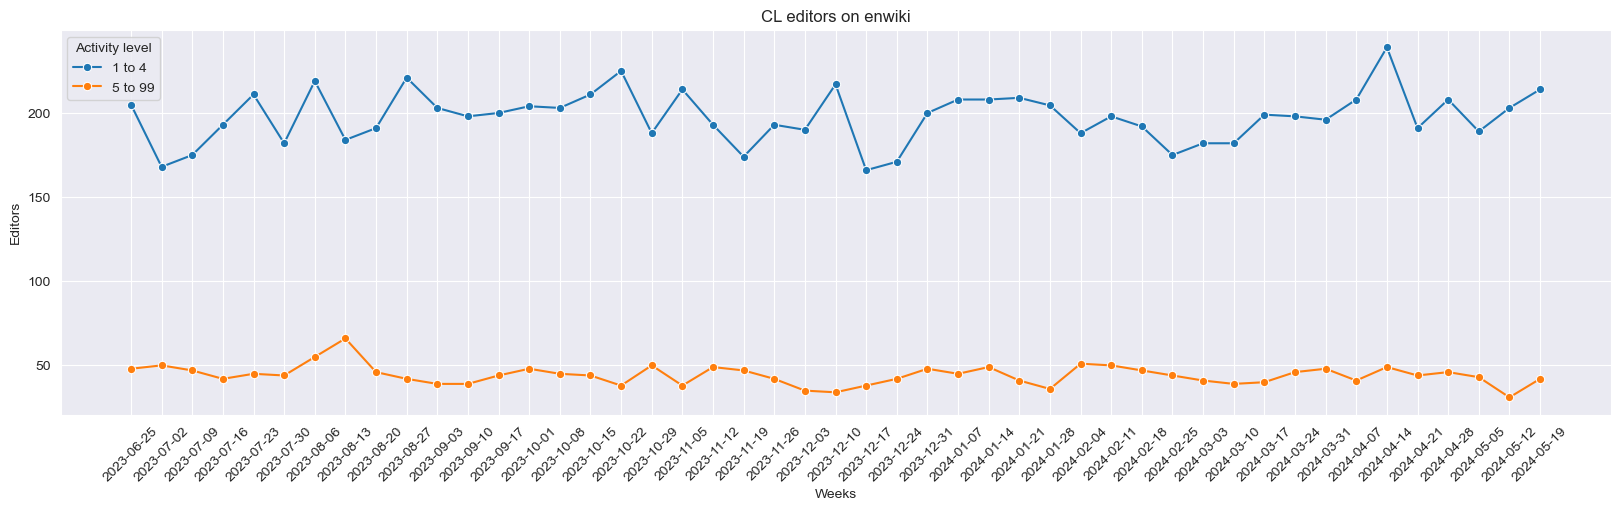

In [48]:
enwiki['editors'] = pd.to_numeric(enwiki['editors'], errors='coerce')
sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))

for level in user_level:
    subset = enwiki[enwiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title(f"{country} editors on enwiki")
plt.legend(title='Activity level')
plt.show()

## edits-enwiki

In [50]:
enwiki_edits = enwiki_filtered.pivot(index='time', columns='activity_level', values='edits')
enwiki_edits.head()

activity_level,1 to 4,5 to 99
time,,
2023-06-25,263,841
2023-07-02,223,916
2023-07-09,243,938
2023-07-16,241,876
2023-07-23,290,1029


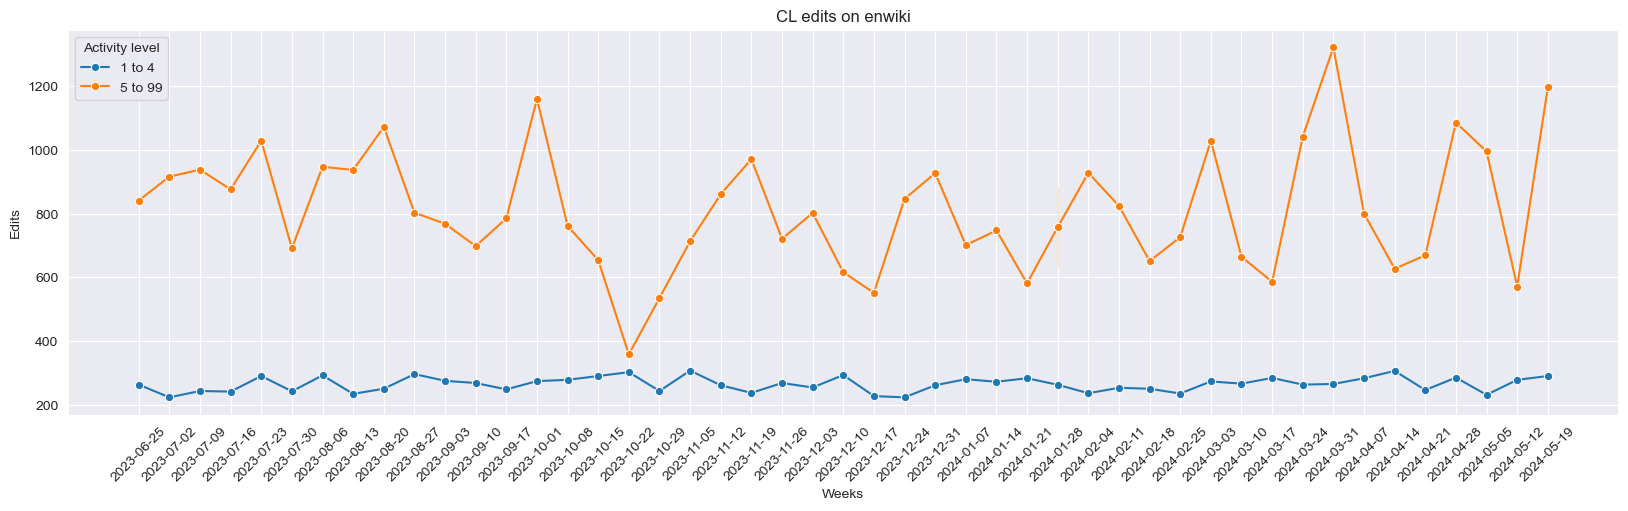

In [51]:
enwiki['edits'] = pd.to_numeric(enwiki['edits'], errors='coerce')
sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))

for level in user_level:
    subset = enwiki[enwiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title(f"{country} edits on enwiki")
plt.legend(title='Activity level')
plt.show()

# ESWIKI

In [52]:
eswiki = masterdf.loc[(masterdf.project == "es.wikipedia")]
eswiki = eswiki.sort_values(by="time")
eswiki_filtered = eswiki[eswiki['time'] != '2024-01-28']
#eswiki_filtered

## editors-eswiki

In [53]:
eswiki_editors = eswiki_filtered.pivot(index='time', columns='activity_level', values='editors')
eswiki_editors = eswiki_editors[user_level]                     # Reorder the columns
eswiki_editors.head()

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-06-25,1214,231,15
2023-07-02,1034,254,15
2023-07-09,1062,266,11
2023-07-16,1236,263,14
2023-07-23,1233,227,19


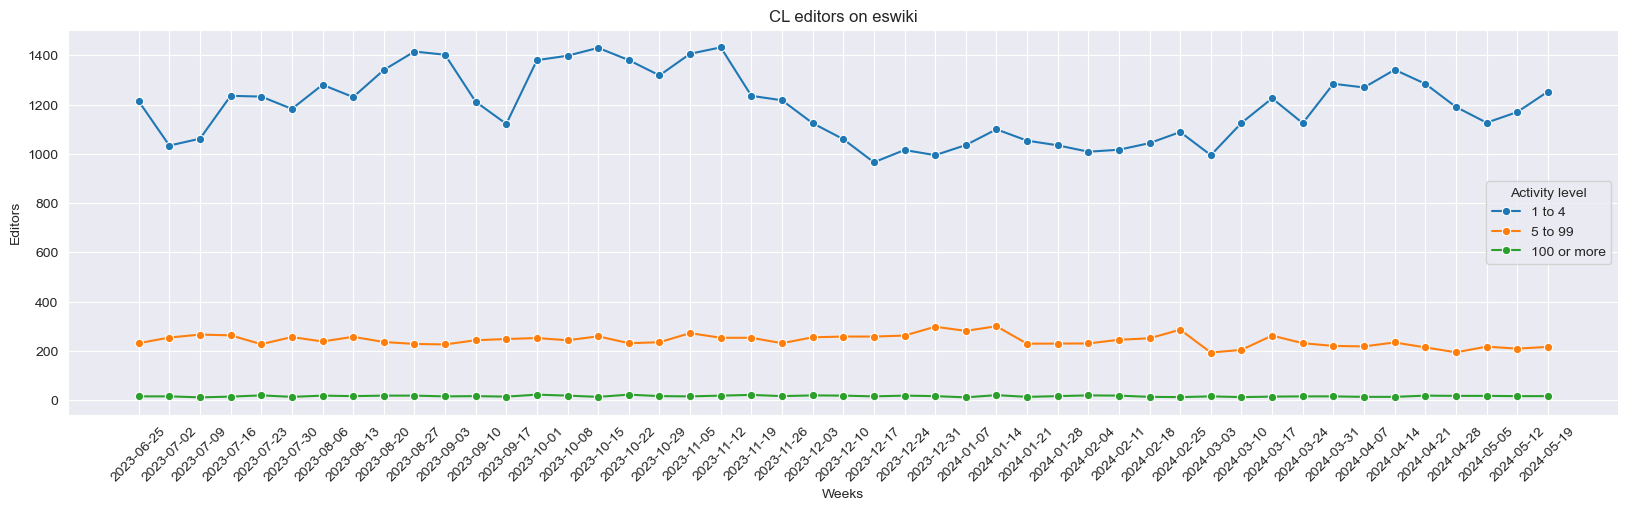

In [55]:
eswiki['editors'] = pd.to_numeric(eswiki['editors'], errors='coerce')
sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))

for level in user_level:
    subset = eswiki[eswiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title(f"{country} editors on eswiki")
plt.legend(title='Activity level')
plt.show()

## edits-eswiki

In [56]:
eswiki_edits = eswiki_filtered.pivot(index='time', columns='activity_level', values='edits')
eswiki_edits = eswiki_edits[user_level]                     
eswiki_edits.head()

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-06-25,1671,4541,1326
2023-07-02,1404,4090,1374
2023-07-09,1404,4918,1420
2023-07-16,1573,4812,1610
2023-07-23,1686,4146,1757


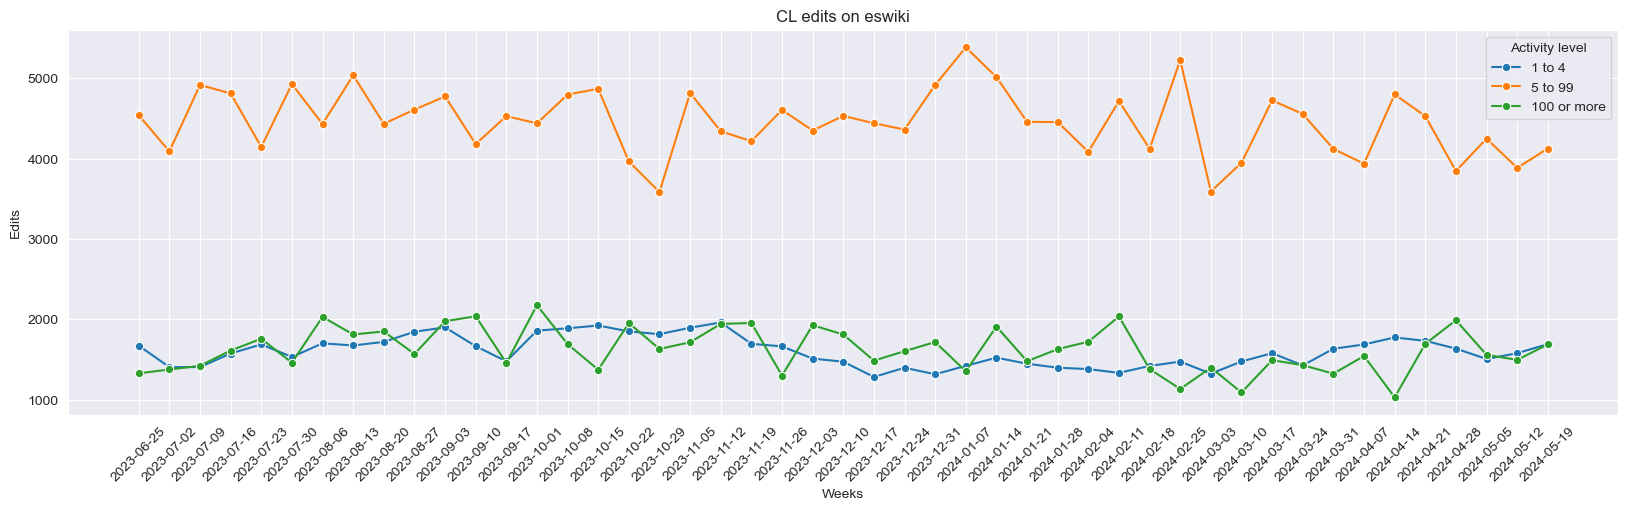

In [57]:
eswiki['edits'] = pd.to_numeric(eswiki['edits'], errors='coerce')
sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))

for level in user_level:
    subset = eswiki[eswiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title(f"{country} edits on eswiki")
plt.legend(title='Activity level')
plt.show()

# WIKIDATA   

In [58]:
wikidata = masterdf.loc[(masterdf.wiki_db == "wikidatawiki")]
wikidata = wikidata.sort_values(by="time")
wikidata_filtered = wikidata[wikidata['time'] != '2024-01-28']


## editors-wikidata

In [59]:
wikidata_editors = wikidata_filtered.pivot(index='time', columns='activity_level', values='editors')
wikidata_editors.head()

activity_level,1 to 4,5 to 99
time,,
2023-06-25,85,39
2023-07-02,81,28
2023-07-09,70,27
2023-07-16,122,34
2023-07-23,99,35


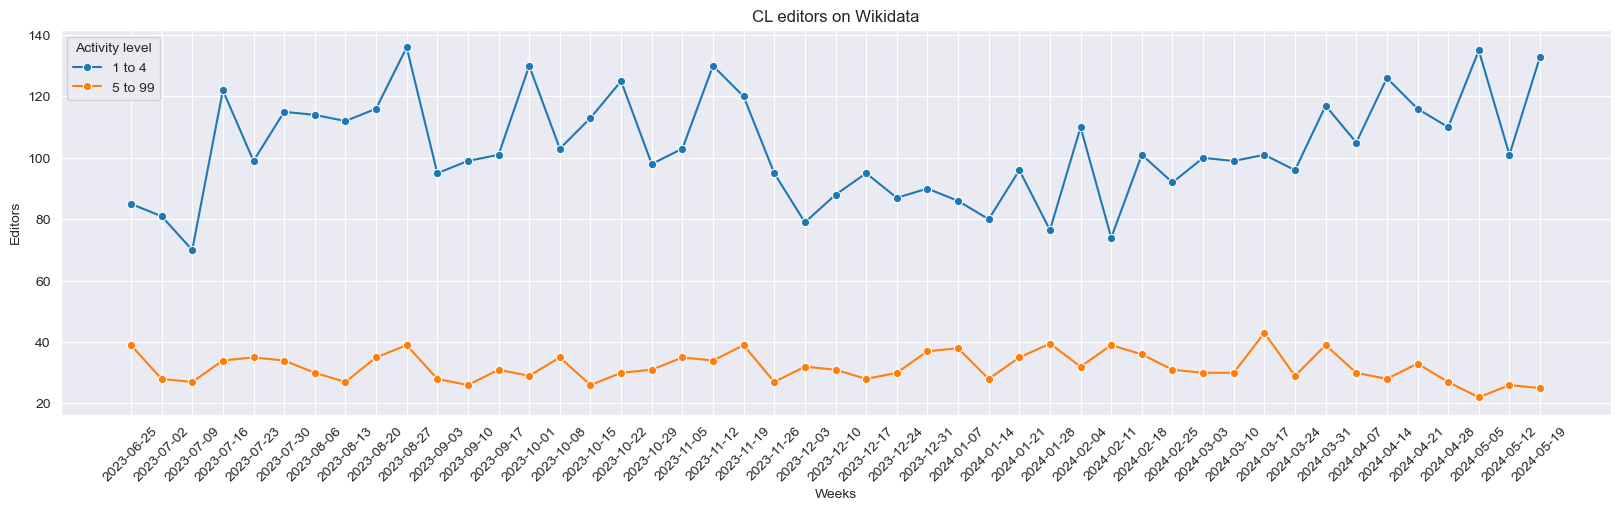

In [60]:
wikidata['editors'] = pd.to_numeric(wikidata['editors'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))
for level in user_level:
    subset = wikidata[wikidata.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title(f"{country} editors on Wikidata")
plt.legend(title='Activity level')
plt.show()

## edits-wikidata

In [61]:
wikidata_edits = wikidata_filtered.pivot(index='time', columns='activity_level', values='edits')
wikidata_edits.head()

activity_level,1 to 4,5 to 99
time,,
2023-06-25,133,689
2023-07-02,124,352
2023-07-09,92,727
2023-07-16,148,636
2023-07-23,131,287


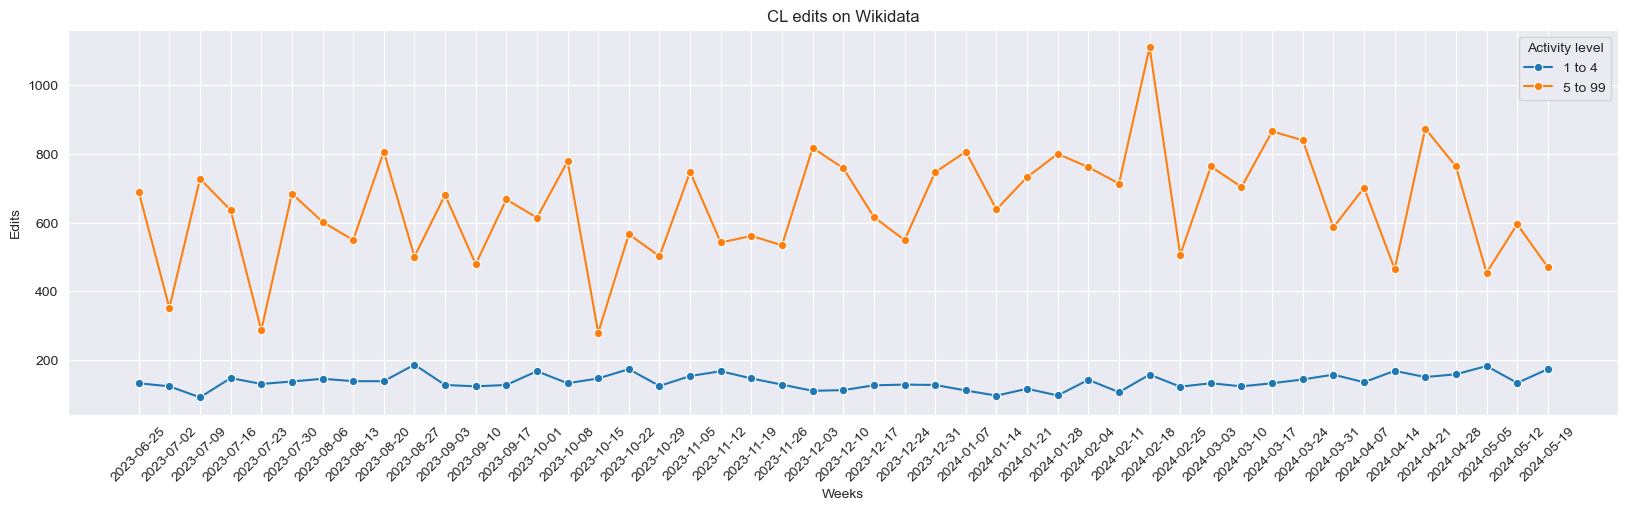

In [62]:
wikidata['edits'] = pd.to_numeric(wikidata['edits'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))
for level in user_level:
    subset = wikidata[wikidata.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title(f"{country} edits on Wikidata")
plt.legend(title='Activity level')
plt.show()

# COMMONS

In [63]:
commons = masterdf.loc[(masterdf.wiki_db == "commonswiki")]
commons = commons.sort_values(by="time")
commons_filtered = commons[commons['time'] != '2024-01-28']

## editors-commons

In [64]:
commons_editors = commons_filtered.pivot(index='time', columns='activity_level', values='editors')
commons_editors.head()

activity_level,1 to 4,5 to 99
time,,
2023-06-25,49,18
2023-07-02,47,23
2023-07-09,53,28
2023-07-16,51,22
2023-07-23,44,24


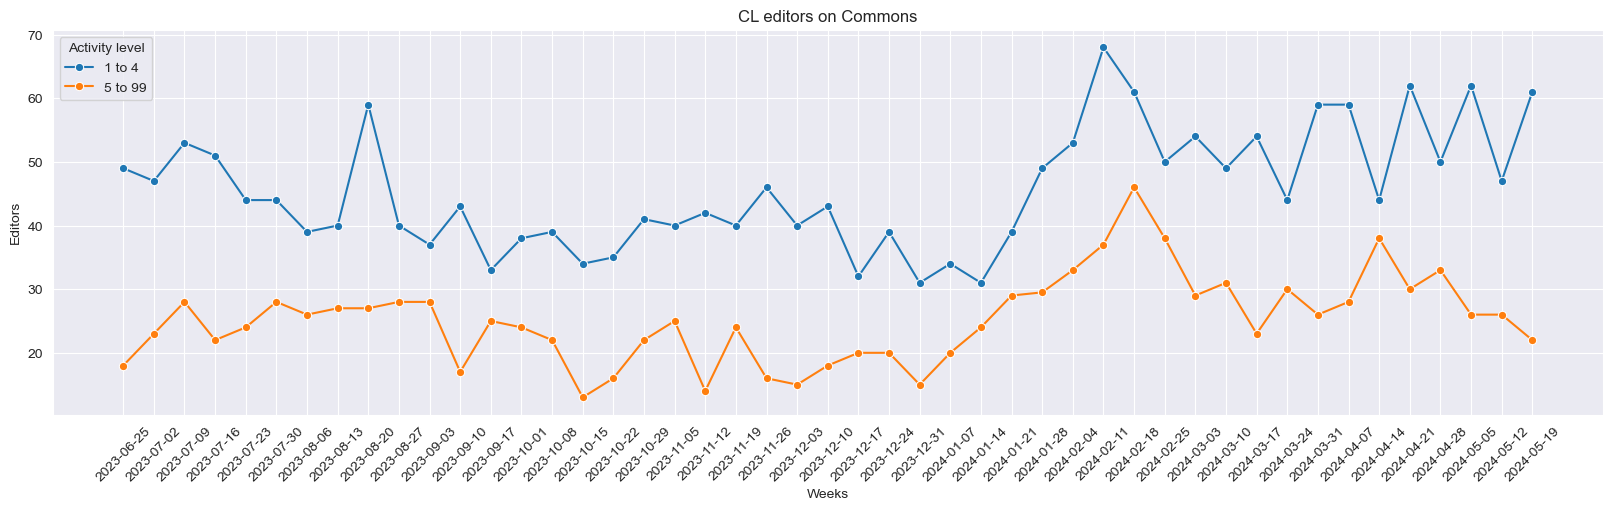

In [65]:
commons['editors'] = pd.to_numeric(commons['editors'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))

for level in user_level:
    subset = commons[commons.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title(f"{country} editors on Commons")
plt.legend(title='Activity level')
plt.show()


## edits-commons

In [66]:
commons_edits = commons_filtered.pivot(index='time', columns='activity_level', values='edits')
commons_edits.head()

activity_level,1 to 4,5 to 99
time,,
2023-06-25,70,427
2023-07-02,60,683
2023-07-09,67,847
2023-07-16,69,217
2023-07-23,50,650


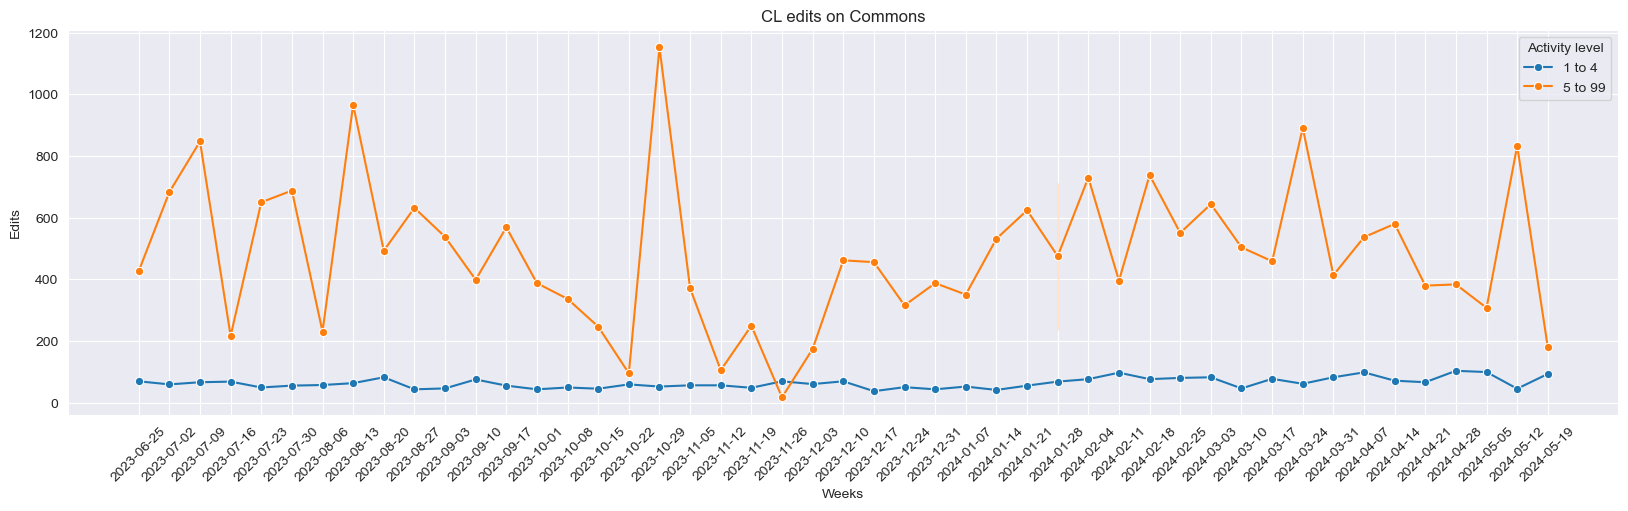

In [67]:
commons['edits'] = pd.to_numeric(commons['edits'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))
for level in user_level:
    subset = commons[commons.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title(f"{country} edits on Commons")
plt.legend(title='Activity level')
plt.show()